In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos el dataset real del Titanic
df = sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

FASE 1: Exploración y Limpieza (Decisiones Difíciles)
1) Revisa los Nulos: Hay una columna que tiene demasiados datos faltantes (más del 70%). Encuéntrala y elimina esa columna completa del mapa. No vale la pena intentar salvarla.

2) El problema de la Edad: La columna age tiene nulos, pero es importante. Rellena los huecos con la mediana.

3) Limpieza de Filas: Si queda algún otro nulo suelto en otra columna (ej: embarked), borra esas pocas filas (dropna).

In [5]:
#uso la moda para llenar los nulls de embark_town
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
#deck tiene muchos Nulls, la dropeo
df=df.drop(columns='deck',axis=1)
#para age voy a usar la mediana
df['age']=df['age'].fillna(df['age'].median())


FASE 2: La Pregunta de Negocio (El Capitán quiere saber)
El mito dice "Mujeres y niños primero". ¿Los datos respaldan esto?

1) Agrupación: Calcula el promedio de supervivencia (survived) agrupado por sexo (sex). ¿Quién sobrevivió más?

Nota: En la columna survived, 1 es vivo y 0 es muerto. El promedio te dará el % de supervivencia.

2) Gráfico: Haz un gráfico de barras (barplot o countplot) que muestre visualmente la cantidad de supervivientes divididos por clase (class). ¿Los ricos (Primera clase) se salvaron más que los de Tercera?

In [6]:
#Porcentaje de ninos y mujeres que sobrevivierons
df[df['sex']=='female']
df[df['age']<18]

mujer_y_ninos=df[(df['sex']=='female') | (df['age']<18)]

sobrevivieron=mujer_y_ninos['survived'].mean()

mujer_y_ninos.groupby('class')['survived'].value_counts()

C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_17484\2082823289.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mujer_y_ninos.groupby('class')['survived'].value_counts()


class   survived
First   1            95
        0             3
Second  1            79
        0             8
Third   0           105
        1            82
Name: count, dtype: int64

C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_17484\2151929978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mujer_y_ninos, x='class', y='survived', palette='viridis')


Text(0.5, 1.0, 'Cantidad de Vivos vs Muertos por Clase')

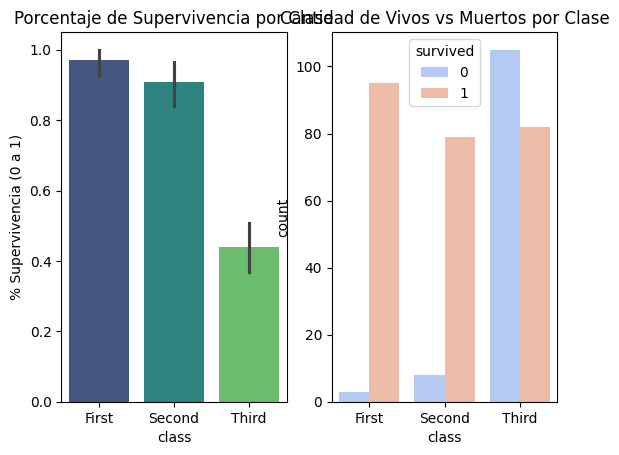

In [7]:
# GRÁFICO 1: Tasa de Supervivencia (Promedio/Porcentaje)
plt.subplot(1, 2, 1) #fila, columna, posicion=1 en la primera columna
sns.barplot(data=mujer_y_ninos, x='class', y='survived', palette='viridis')
plt.title('Porcentaje de Supervivencia por Clase')
plt.ylabel('% Supervivencia (0 a 1)')
# GRÁFICO 2: Conteo Real (Cantidad de personas)
plt.subplot(1, 2, 2) #fila, columna, posicion=2 2da columna. si pone dos veces (1,2,1) el ultimo grafico borra el anterior. Ahora salen uno al lado del otro
sns.countplot(data=mujer_y_ninos, x='class', hue='survived', palette='coolwarm')
plt.title('Cantidad de Vivos vs Muertos por Clase')

FASE 3: El Filtro Complejo (Tu examen final)
Queremos encontrar una historia trágica específica para un documental. Filtra y muéstrame el DataFrame con las personas que cumplan TODAS estas condiciones a la vez:

* Eran de Tercera Clase (pclass == 3).

* Eran Mujeres.

* NO sobrevivieron.

In [11]:
fase3=df[(df['pclass']==3)&(df['sex']=='female')&(df['survived']==0)]
len(fase3)

72